In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing various libraries used and example cases we wanted to explore
import numpy as np
import pandas as pd
import seaborn as sns
import demoji as demoji
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import nltk
import sklearn
import re
from PIL import Image
from scipy.stats import chi2_contingency
from datetime import datetime
from patsy import dmatrices
from nltk.corpus import wordnet
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# download the respective emoji codes for the cleaning process
demoji.download_codes()
# download stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

... OK (Got response in 0.33 seconds)
Writing emoji data to C:\Users\marvi\.demoji\codes.json ...
... OK


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
fullData = pd.read_csv('JORDI.csv')

In [4]:
# assign df format for viewing
pd.set_option('display.float_format', '{:.4f}'.format)

In [5]:
# basic description of numeriacl values only
fullData.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Unnamed: 0,id,timezone,user_id_str,day,hour,nlikes,nreplies,nretweets,geo,retweet_id
count,2430.00,2430.00,2430.00,2430.00,2430.00,2430.00,2430.00,2430.00,2430.00,0.00,0.00
mean,1624.50,1403553235435309824.00,-700.00,468894072850894784.00,4.33,13.70,25.60,1.20,3.84,nan,nan
std,701.62,994583545671859.38,0.00,574867739384624896.00,1.42,6.42,187.89,13.30,38.56,nan,nan
min,410.00,1397887673025531904.00,-700.00,5796972.00,1.00,0.00,0.00,0.00,0.00,nan,nan
25%,1017.25,1403208524946124800.00,-700.00,264412690.00,4.00,9.00,0.00,0.00,0.00,nan,nan
50%,1624.50,1403380484038637568.00,-700.00,1957506408.00,4.00,14.00,0.00,0.00,0.00,nan,nan
75%,2231.75,1403872390316235776.00,-700.00,1110135491211544576.00,5.00,20.00,2.00,0.00,0.00,nan,nan
max,2839.00,1406099563430223872.00,-700.00,1403195381324857344.00,7.00,23.00,5652.00,465.00,1274.00,nan,nan


In [6]:
# include non-numerical
fullData.describe(include='all')

,Unnamed: 0,id,date,timezone,place,tweet,language,hashtags,user_id_str,username,day,hour,retweet,nlikes,nreplies,nretweets,geo,retweet_id
count,2430.0000,2430.0000,2430,2430.0000,1,2430,2430,2430,2430.0000,2430,2430.0000,2430.0000,2430,2430.0000,2430.0000,2430.0000,0.0000,0.0000
unique,nan,nan,2400,nan,1,2375,29,352,nan,1074,nan,nan,1,nan,nan,nan,nan,nan
top,nan,nan,2021-06-11 11:29:07,nan,"{'type': 'Point', 'coordinates': [3.816667, -7...",#JORDI,en,['jordi'],nan,levinetattoos,nan,nan,False,nan,nan,nan,nan,nan
freq,nan,nan,3,nan,1,35,1199,1407,nan,115,nan,nan,2430,nan,nan,nan,nan,nan
mean,1624.5000,1403553235435309824.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,468894072850894784.0000,NaN,4.3280,13.6996,NaN,25.6037,1.2049,3.8354,nan,nan
std,701.6249,994583545671859.3750,NaN,0.0000,NaN,NaN,NaN,NaN,574867739384624896.0000,NaN,1.4153,6.4164,NaN,187.8869,13.2961,38.5611,nan,nan
min,410.0000,1397887673025531904.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,5796972.0000,NaN,1.0000,0.0000,NaN,0.0000,0.0000,0.0000,nan,nan
25%,1017.2500,1403208524946124800.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,264412690.0000,NaN,4.0000,9.0000,NaN,0.0000,0.0000,0.0000,nan,nan
50%,1624.5000,1403380484038637568.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,1957506408.0000,NaN,4.0000,14.0000,NaN,0.0000,0.0000,0.0000,nan,nan
75%,2231.7500,1403872390316235776.0000,NaN,-700.0000,NaN,NaN,NaN,NaN,1110135491211544576.0000,NaN,5.0000,20.0000,NaN,2.0000,0.0000,0.0000,nan,nan


In [7]:
# description of objects only
fullData.describe(include=['object'])

,date,place,tweet,language,hashtags,username
count,2430,1,2430,2430,2430,2430
unique,2400,1,2375,29,352,1074
top,2021-06-11 11:29:07,"{'type': 'Point', 'coordinates': [3.816667, -7...",#JORDI,en,['jordi'],levinetattoos
freq,3,1,35,1199,1407,115


In [8]:
# missing values actual #
fullData.isnull().sum()

Unnamed: 0        0
id                0
date              0
timezone          0
place          2429
tweet             0
language          0
hashtags          0
user_id_str       0
username          0
day               0
hour              0
retweet           0
nlikes            0
nreplies          0
nretweets         0
geo            2430
retweet_id     2430
dtype: int64

In [9]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing above for better understanding given the size.
for col in fullData.columns:
    pct_missing = np.mean(fullData[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
id - 0%
date - 0%
timezone - 0%
place - 100%
tweet - 0%
language - 0%
hashtags - 0%
user_id_str - 0%
username - 0%
day - 0%
hour - 0%
retweet - 0%
nlikes - 0%
nreplies - 0%
nretweets - 0%
geo - 100%
retweet_id - 100%


In [10]:
# changes to the dataframe to work with originally established code. While working on the project scraping output had changed 
fullData["text"] = fullData["tweet"]
fullData["retweetcount"] = fullData["nretweets"]
fullData["likecount"] = fullData["nlikes"]
fullData["replycount"] = fullData["nreplies"]
fullData["created_at"] = fullData["date"]

In [11]:
# preliminary examiniation of the post's text
pd.Series(np.concatenate([x.split() for x in fullData.text])).value_counts().head(50)

#JORDI           1889
@maroon5          812
#Maroon5          622
the               433
de                387
a                 366
to                309
#Jordi            297
JORDI             290
#jordi            286
OUT               278
NOW               274
album             268
I                 240
5                 235
is                230
you               227
Maroon            214
que               205
and               204
new               186
on                182
of                176
álbum             174
#AskM5            139
this              139
in                138
me                138
do                129
#maroon5          127
y                 125
-                 124
my                123
o                 120
love              116
no                111
for               111
with              105
el                103
la                 96
it                 95
e                  92
was                92
from               89
en                 88
@maroon5br

In [38]:
# Create stop word list
stop_words = nltk.corpus.stopwords.words('english')

# Keep negative words for sentiment implications, 
kept_words = ['don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 
              'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
              'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
              "mustn't", 'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', 
              "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]    

# words we want to keep with our analysis
for word in kept_words:
    stop_words.remove(word)

# Manually remove stop words
def noStopWords(text):
    for stopword in stop_words:
        stopword = ' ' + stopword + ' '
        text = text.replace(stopword, ' ')
    return text

In [39]:
# Manually remove stemming
# stemming removed the contextual understanding of a post so used lem. instead
def noStem(text):
    stemmer = nltk.porter.PorterStemmer()
    stemmed = ' '.join([stemmer.stem(token) for token in text.split()])
    return stemmed

In [40]:
# manually clean the text
def cleanTweet(text):
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweets:
    text = re.sub(r'RT : ', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Make all lowercase
    text = text.lower()
    return text

In [41]:
# manually removing the emojis from the text
def noEmoji(text):
    removing = demoji.findall(text)
    for item in removing.keys():
        text = text.replace(item,"")
    return text

In [42]:
# capture the specific position of a word so grammatically the lemmatizer would make sense
def get_wordnet_pos(text):
    if text.startswith('J'):
        return wordnet.ADJ
    elif text.startswith('V'):
        return wordnet.VERB
    elif text.startswith('N'):
        return wordnet.NOUN
    elif text.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [43]:
# create df for analysis
cleanFullData = fullData

In [44]:
# logic for removing repeated posts for a specific user i.e. I can copy someone else's tweet 
# and post that once, before that's considered spam. If I as a user share the exact same post, 
# then duplicates won't be included. Left it separated from above cleaning, if we want to report either case
# For this analysis reassign and removed duplicated posts from the same user

cleanFullData["unique"] = cleanFullData["username"] + cleanFullData["text"]
cleanFullData = cleanFullData.drop_duplicates(subset = ["unique"])


In [45]:
# applying manual clean
cleanFullData["text"] = cleanFullData["text"].apply(cleanTweet)

<ipython-input-45-13929c29a941>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFullData["text"] = cleanFullData["text"].apply(cleanTweet)


In [46]:
# remove emojis
cleanFullData["text"] = cleanFullData["text"].apply(noEmoji)

<ipython-input-46-4a95345df221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFullData["text"] = cleanFullData["text"].apply(noEmoji)


In [47]:
# remove stop words
cleanFullData["text"] = cleanFullData["text"].apply(noStopWords)

<ipython-input-47-6e653d5824a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanFullData["text"] = cleanFullData["text"].apply(noStopWords)


In [48]:
# checking for any empty posts
cleanFullData = cleanFullData.drop(cleanFullData[cleanFullData['text'] ==''].index)

In [49]:
# apply lem. to change word forms
cleanFullData["text_lem"] = cleanFullData["text"].apply(word_tokenize)
cleanFullData["text_lem"] = cleanFullData["text_lem"].apply(nltk.tag.pos_tag)

In [50]:
# finding position
cleanFullData["text_lem"] = cleanFullData["text_lem"].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

# lem the words then reappend them
wnl = WordNetLemmatizer()
cleanFullData["text"] = cleanFullData["text_lem"].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
cleanFullData["text"] = [' '.join(map(str, l)) for l in cleanFullData["text"]]

In [51]:
# cleaning the data
cleanFullData["text"] = cleanFullData["text"].str.strip()

In [52]:
# manually convert hashtags to lower case to ensure consistency
cleanFullData["hashtagsLower"] = cleanFullData["hashtags"].str.lower() 

In [53]:
# make a list
cleanFullData["hashtagsList"] = cleanFullData["hashtagsLower"].to_list()

In [54]:
# take the converted list and separate the hashtags
cleanFullData["hashtagsList"] = cleanFullData["hashtagsList"].str.split(" ", n = 200, expand = True)

In [55]:
# and create a count of the hashtags
cleanFullData["hashtagsCount"] = cleanFullData["hashtagsList"].str.len()

# creating a count of the text after it's been transformed 
cleanFullData["textCount"] = cleanFullData["text"].str.len()

In [56]:
# checking the lem. worked
cleanFullData.head(3)

,Unnamed: 0,id,date,timezone,place,tweet,language,hashtags,user_id_str,username,...,retweetcount,likecount,replycount,created_at,unique,text_lem,hashtagsLower,hashtagsList,hashtagsCount,textCount
0,410,1406099563430223872,2021-06-18 21:00:34,-700,NaN,You Pick It! - Which Album to Review in July? ...,en,"['maroon5', 'jordi', 'brucespringsteen', 'born...",717504864117530629,2loud2oldmusic,...,1,1,0,2021-06-18 21:00:34,2loud2oldmusicYou Pick It! - Which Album to Re...,"[(you, n), (pick, v), (album, a), (review, n),...","['maroon5', 'jordi', 'brucespringsteen', 'born...","['maroon5',",11,161
1,411,1406044334538039300,2021-06-18 17:21:07,-700,NaN,A música que eu menos gostei do #jordi não sai...,pt,['jordi'],324463056,mottajuu,...,0,0,0,2021-06-18 17:21:07,mottajuuA música que eu menos gostei do #jordi...,"[(a, n), (música, n), (que, n), (eu, v), (meno...",['jordi'],['jordi'],9,86
2,412,1406043900792430594,2021-06-18 17:19:23,-700,NaN,#m5 #maroon5 #JORDI #buttonjordi @maroon5 ht...,und,"['m5', 'maroon5', 'jordi', 'buttonjordi']",1108624052334268416,Scultra_Sculz,...,0,0,0,2021-06-18 17:19:23,Scultra_Sculz#m5 #maroon5 #JORDI #buttonjordi ...,"[(m5, n), (maroon5, n), (jordi, n), (buttonjor...","['m5', 'maroon5', 'jordi', 'buttonjordi']","['m5',",6,28


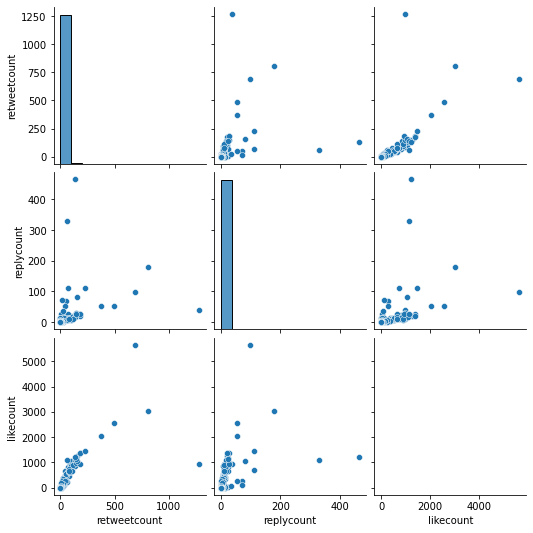

In [57]:
sns.pairplot(cleanFullData[['retweetcount', 'replycount', 'likecount']])

In [33]:
# lookinng at how many times a user has posted, top 10
cleanFullData['username'].value_counts().head(10)

levinetattoos     115
sweetmaroon3r      60
maroon5            53
timberlevinera     53
worldmarooner      50
sunhabit222        47
teachmeshawnn      40
paolalb8           34
emilyromansoto     31
wisteriagrew       28
Name: username, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix\n')

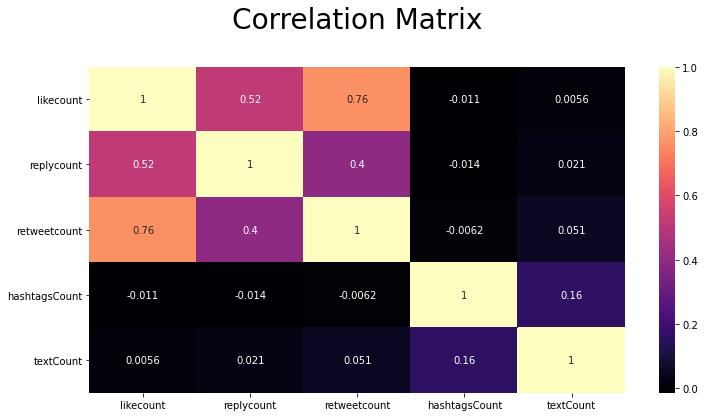

In [34]:
# correlation matrix
fig, ax = plt.subplots(figsize=(12,6))
cleanFullData[['likecount','replycount','retweetcount', 'hashtagsCount', 'textCount']].corr()
sns.heatmap(cleanFullData[['likecount','replycount','retweetcount', 'hashtagsCount', 'textCount']].corr(), annot=True, cmap = "magma")
ax.set_title("Correlation Matrix\n", size = 28)

In [35]:
# counting the most occuring in pct
count = cleanFullData["hashtagsList"].value_counts(normalize = True).head(5)
count

['jordi']     0.5799
['jordi',     0.1718
['maroon5',   0.1151
['askm5',     0.0451
['lost',      0.0203
Name: hashtagsList, dtype: float64

In [36]:
count.describe()

count   5.0000
mean    0.1864
std     0.2279
min     0.0203
25%     0.0451
50%     0.1151
75%     0.1718
max     0.5799
Name: hashtagsList, dtype: float64

<ipython-input-37-ab5e91f1c998>:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(count, colors = colors,


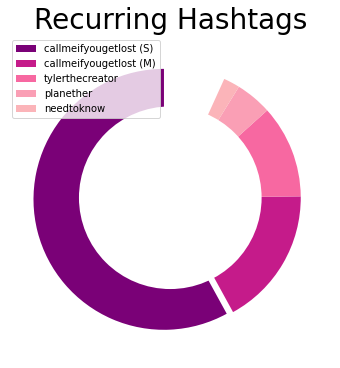

In [37]:
# showing that pie
fig, ax = plt.subplots(figsize=(12,6))
labels = 'jordi (S)', 'jordi (M)', 'maroon5', 'askm', 'lost', 'others'
colors = '#7a0177', '#c51b8a', '#f768a1', '#fa9fb5', '#fbb4b9', '#feebe2'
expansion = (0.05, 0.0, 0.0, 0.0, 0.0)

plt.pie(count, colors = colors,
       startangle = 90, pctdistance = 0.85, labeldistance =10, explode = expansion)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.set_title("Recurring Hashtags", size = 28)
ax.legend(labels)
plt.show()


In [58]:
# defining subjectivity and polarity to understand sentiment using TextBlob
def getTextSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getTextPolarity(text):
    return TextBlob(text).sentiment.polarity

In [59]:
# capturing pol. and sub.
cleanFullData['subjectivity'] = cleanFullData['text'].apply(getTextSubjectivity)

cleanFullData['polarity'] = cleanFullData['text'].apply(getTextPolarity)

In [60]:
# funciton to define sentiment
def getTextAnalysis(a):
    if a > 0:
        return "Positive"
    elif a == 0:
        return "Neutral"
    else:
        return "Negative"

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [61]:
# capturing sentiment
cleanFullData["sentiment"] = cleanFullData['polarity'].apply(getTextAnalysis)

In [62]:
# changing date type to look at 3 distinct periods
cleanFullData["created_at"] = pd.to_datetime(cleanFullData['created_at'])
cleanFullData['date'] = pd.to_datetime(cleanFullData['date']).dt.date

In [63]:
# how we assign the date against targets
def getDatePost(a):
    # date of release
    date_str = "2021-06-11"
    date =  datetime.strptime(date_str, '%Y-%m-%d').date()
    if a < date:
        return "PRE"
    elif a == date:
        return "ON"
    else:
        return "POST"

In [64]:
# capturing hype status
cleanFullData['hype_loop'] = cleanFullData['date'].apply(getDatePost)

In [65]:
# counting sentiment
cleanFullData["sentiment"].value_counts(normalize = True)

Neutral    0.6701
Positive   0.2873
Negative   0.0426
Name: sentiment, dtype: float64

In [66]:
# counting post type based on date
cleanFullData["hype_loop"].value_counts(normalize = True)

PRE    0.3680
ON     0.3224
POST   0.3096
Name: hype_loop, dtype: float64

In [67]:
daysBeforeDrop = cleanFullData['date'].value_counts().sort_index(ascending=True)

Text(0, 0.5, 'Frequency of Tweet Containing #PlanetHer')

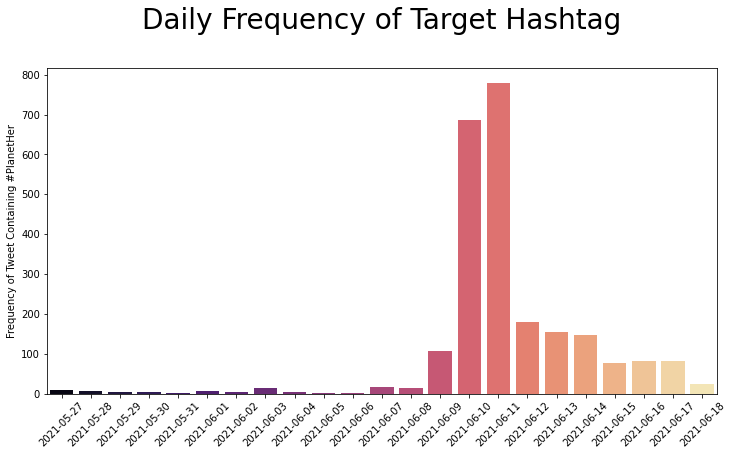

In [68]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x = daysBeforeDrop.index, y = daysBeforeDrop, palette="magma")
plt.xticks(rotation=45)
ax.set_title("Daily Frequency of Target Hashtag\n", size = 28)
ax.set_ylabel("Frequency of Tweet Containing #PlanetHer")

In [69]:
dayBeforeReleaseHoursFirstDay = cleanFullData[cleanFullData['date'] == pd.to_datetime('2021-06-11')]['created_at'].dt.hour

Text(0.5, 0, 'Time Posted')

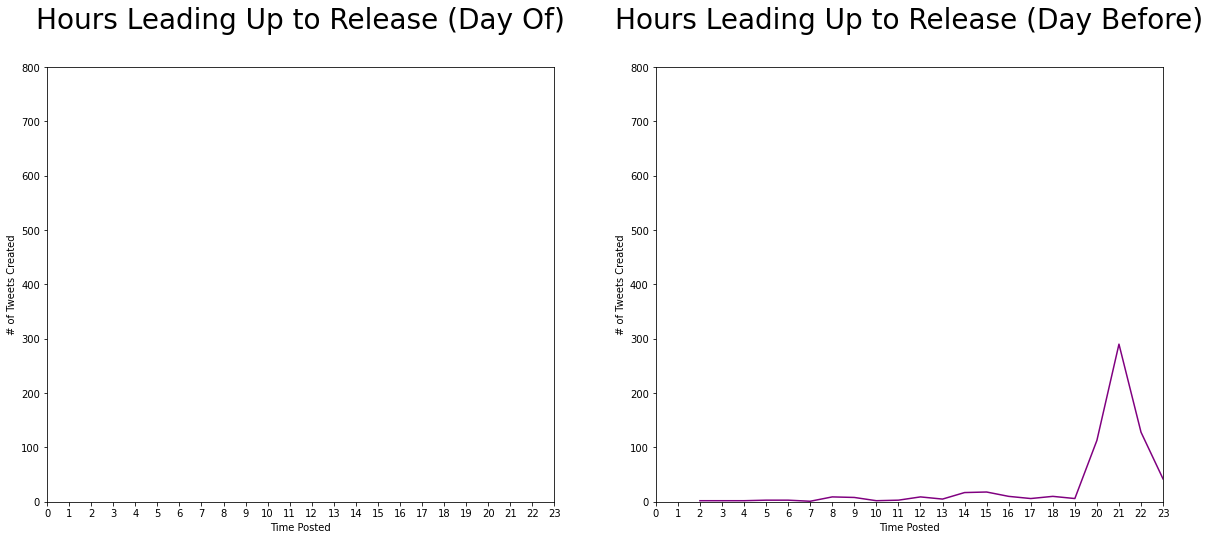

In [71]:
dayBeforeReleaseHours = cleanFullData[cleanFullData['date'] == pd.to_datetime('2021-06-10')]['created_at'].dt.hour
#day_before_release_hours_df.index = pd.to_datetime(day_before_release_hours_df.index, format = '%H')

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.lineplot(x = dayBeforeReleaseHoursFirstDay.value_counts().sort_index(ascending=True).index,
             y = dayBeforeReleaseHoursFirstDay.value_counts().sort_index(ascending=True), ax = ax1, color = "purple")

sns.lineplot(x = dayBeforeReleaseHours.value_counts().sort_index(ascending=True).index,
             y = dayBeforeReleaseHours.value_counts().sort_index(ascending=True), ax = ax2, color = "purple")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax1.set_ylim(0,800)
ax1.set_xlim(0,23)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.set_ylim(0,800)
ax2.set_xlim(0,23)

# Doja Cat's album dropped about the time the tweet frequency peaks
ax1.set_title("Hours Leading Up to Release (Day Of)\n", size = 28)
ax1.set_ylabel("# of Tweets Created")
ax1.set_xlabel("Time Posted")

# Doja Cat's album dropped about the time the tweet frequency peaks
ax2.set_title("Hours Leading Up to Release (Day Before)\n", size = 28)
ax2.set_ylabel("# of Tweets Created")
ax2.set_xlabel("Time Posted")


In [73]:
# assign twitter logo to mask
mask = np.array(Image.open("twitter.png"))
# know that the collection of mask is 0 and needs to be reassigned
# mask 

In [74]:
# function to reassign 0 within mask to 255
def transformMask(value):
    if value == 0:
        return 255
    else:
        return value

In [75]:
# created a multidimensional array
maskable_image = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

In [76]:
# rewrite within new md array 
for i in range(len(mask)):
    maskable_image[i] = list(map(transformMask, mask[i]))

In [77]:
maskable_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

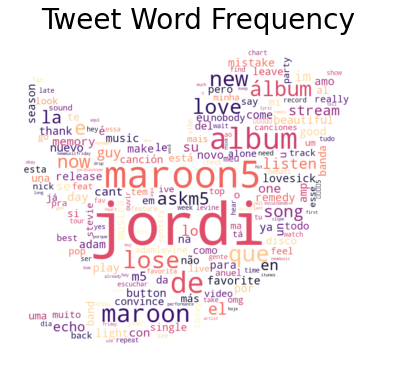

In [78]:
# creating a word cloud of the text 
fig, ax = plt.subplots(figsize=(12,6))
words = ' '.join([text for text in cleanFullData['text']])
# set collocations to false to show unique words instead of auto collections
wordCloud = WordCloud(width=600, height=400, collocations=False,
                     colormap="magma", mask = maskable_image, background_color = "white").generate(words)

ax.set_title("Tweet Word Frequency", size = 28)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Tweet Sentiment')

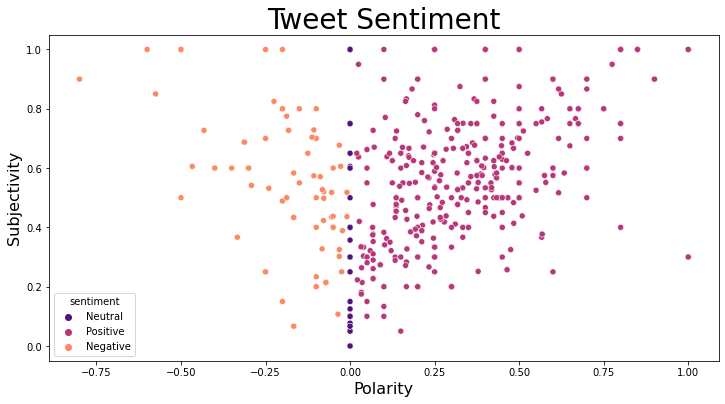

In [79]:
pol = cleanFullData['polarity']
sub = cleanFullData['subjectivity']
sen = cleanFullData['sentiment']

fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = pol, y = sub, data = cleanFullData, hue = "sentiment", palette = "magma")

ax.set_xlabel("Polarity", size = 16)
ax.set_ylabel("Subjectivity", size = 16)
ax.set_title("Tweet Sentiment", size = 28)

In [80]:
# creating contingency table
contingency_table = pd.crosstab(cleanFullData['hype_loop'], cleanFullData['sentiment'])

Text(87.0, 0.5, 'Sentiment')

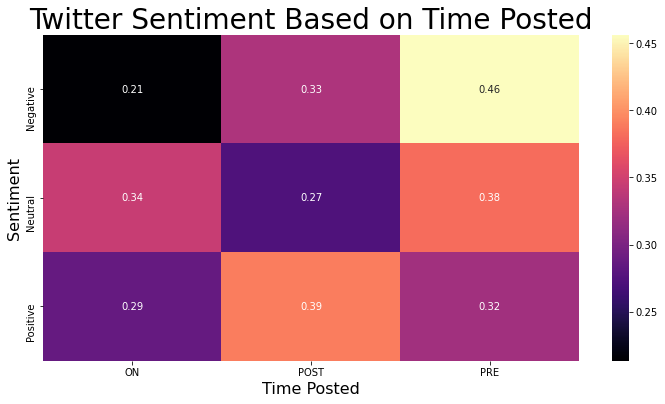

In [81]:
# reporting as a percentage
contingency_pct = pd.crosstab(cleanFullData['sentiment'], cleanFullData['hype_loop'], normalize='index')
contingency_pct

plt.figure(figsize = (12,6))
sns.heatmap(contingency_pct, annot = True, cmap = "magma")
plt.title("Twitter Sentiment Based on Time Posted", fontsize = 28)
plt.xlabel("Time Posted", fontsize = 16)
plt.ylabel("Sentiment", fontsize = 16)

In [82]:
# calculating chi-test because we are looking at the relationship of two categorical variables
c, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.5
# H0 no relationship between time of post and the sentiment
# H1 a relationship exists and expect positive to increase up to and day of the release while negative increases after
# Assume human online nature that consumers are more likely to share negative criticisms after experiencing something whiie inverserly are more likely
# to 'hype' something prior to release

print("The p-value is: " + str(p))

if p <= alpha:
    print("Reject H0: A relationship exists.")
else:
    print("Accept H0: The variables don't have a relationship.")
    
# preliminary data suggests over time a relationship exists. We want to collect more data to better understand the specifics between pre, on and post
    

The p-value is: 1.454914723262932e-07
Reject H0: A relationship exists.


In [83]:
# check the count to train/test the model
cleanFullData.describe()

,Unnamed: 0,id,timezone,user_id_str,day,hour,nlikes,nreplies,nretweets,geo,retweet_id,retweetcount,likecount,replycount,hashtagsCount,textCount,subjectivity,polarity
count,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000,0.0000,0.0000,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000,2416.0000
mean,1623.8758,1403554295309627904.0000,-700.0000,466678732681370368.0000,4.3249,13.7140,25.7483,1.2115,3.8572,nan,nan,3.8572,25.7483,1.2115,9.4524,59.1184,0.1979,0.0998
std,702.4741,997138990259091.8750,0.0000,574300137182696448.0000,1.4177,6.4153,188.4210,13.3343,38.6716,nan,nan,38.6716,188.4210,13.3343,1.4851,49.7217,0.3033,0.2212
min,410.0000,1397887673025531904.0000,-700.0000,5796972.0000,1.0000,0.0000,0.0000,0.0000,0.0000,nan,nan,0.0000,0.0000,0.0000,6.0000,5.0000,0.0000,-0.8000
25%,1014.7500,1403208484093603840.0000,-700.0000,264412690.0000,4.0000,9.0000,0.0000,0.0000,0.0000,nan,nan,0.0000,0.0000,0.0000,9.0000,25.0000,0.0000,0.0000
50%,1624.5000,1403380484038637568.0000,-700.0000,1957506408.0000,4.0000,14.0000,0.0000,0.0000,0.0000,nan,nan,0.0000,0.0000,0.0000,9.0000,43.0000,0.0000,0.0000
75%,2232.2500,1403880410546806784.0000,-700.0000,1108624052334268416.0000,5.0000,20.0000,2.0000,0.0000,0.0000,nan,nan,0.0000,2.0000,0.0000,9.0000,76.0000,0.4545,0.1364
max,2839.0000,1406099563430223872.0000,-700.0000,1403195381324857344.0000,7.0000,23.0000,5652.0000,465.0000,1274.0000,nan,nan,1274.0000,5652.0000,465.0000,24.0000,273.0000,1.0000,1.0000


In [85]:
# calculate the % used for train
2416 * .75

1812.0

In [86]:
# assigning train and test for different model comparisons
# regular assignment
# train is 75% and test os 25%
model_train = cleanFullData[:1812]
model_test = cleanFullData[1812:]

In [87]:
# vectorizaiton of data for testing and training
# looking at sequence of two words when range = (2,2)
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(2,2),min_df=8)
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)

(1812, 94) (604, 94)


In [88]:
# Check the # of assigned sentiment already in train
model_train.sentiment.value_counts()

Neutral     1219
Positive     524
Negative      69
Name: sentiment, dtype: int64

In [89]:
# Check the # of assigned sentiment already in test
model_test.sentiment.value_counts()

Neutral     400
Positive    170
Negative     34
Name: sentiment, dtype: int64

In [90]:
# For comparative analysis construct numerical categories for the three types of sentiments
def getLabel(a):
    if a > 0:
        return 1
    elif a == 0:
        return 0
    else:
        return -1
    
train_labels = model_train['polarity'].apply(getLabel)
test_labels = model_test['polarity'].apply(getLabel)

In [ ]:
### when going through the 3 models:
# unigram - unique words in the text
# uni + bigram - permutations of two consecutive words
# uni + bi + trigram - permutations of three consecutive words

              precision    recall  f1-score   support

    Negative       0.75      0.09      0.16        34
     Neutral       0.83      0.99      0.91       400
    Positive       0.92      0.66      0.77       170

    accuracy                           0.85       604
   macro avg       0.83      0.58      0.61       604
weighted avg       0.85      0.85      0.83       604



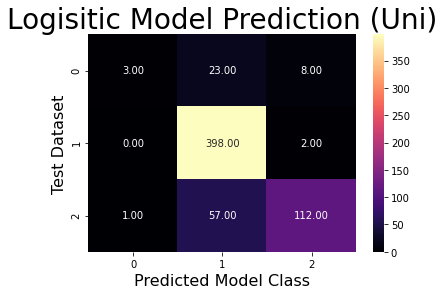

In [93]:
# logistic + uni
clf = sklearn.linear_model.LogisticRegression(max_iter=9000)
clf.fit(tf_features_train, train_labels)
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign macro accuracy score
L1score = "86%"

cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("Logisitic Model Prediction (Uni)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 15206) (604, 15206)
              precision    recall  f1-score   support

    Negative       0.75      0.09      0.16        34
     Neutral       0.83      0.99      0.91       400
    Positive       0.92      0.66      0.77       170

    accuracy                           0.85       604
   macro avg       0.83      0.58      0.61       604
weighted avg       0.85      0.85      0.83       604



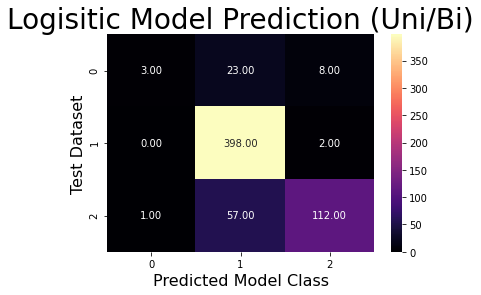

In [94]:
# logistic + uni/bi
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print(tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.linear_model.LogisticRegression(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(test_labels, predictions)
# assign accuracy score
L2score = "83%"

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("Logisitic Model Prediction (Uni/Bi)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 27453) (604, 27453)
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.16        34
     Neutral       0.82      0.99      0.90       400
    Positive       0.92      0.61      0.73       170

    accuracy                           0.84       604
   macro avg       0.91      0.57      0.60       604
weighted avg       0.86      0.84      0.81       604



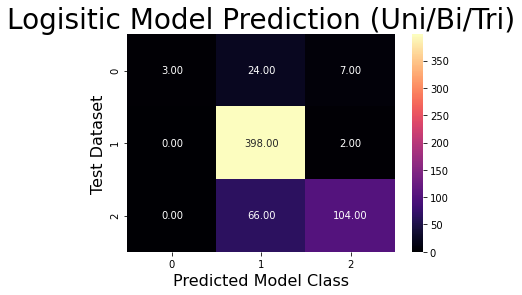

In [96]:
# logistic + uni/bi/tri
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.linear_model.LogisticRegression(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
L3score = "91%"

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("Logisitic Model Prediction (Uni/Bi/Tri)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 4196) (604, 4196)
              precision    recall  f1-score   support

    Negative       0.70      0.21      0.32        34
     Neutral       0.89      0.99      0.94       400
    Positive       0.91      0.80      0.85       170

    accuracy                           0.89       604
   macro avg       0.83      0.67      0.70       604
weighted avg       0.89      0.89      0.88       604



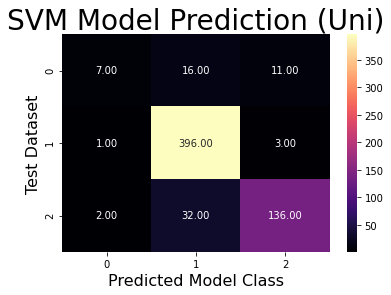

In [98]:
# SVM + uni
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC(max_iter=9000)
clf.fit(tf_features_train, train_labels)
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
SVM1score = "83%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("SVM Model Prediction (Uni)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 15206) (604, 15206)
              precision    recall  f1-score   support

    Negative       0.62      0.15      0.24        34
     Neutral       0.85      1.00      0.92       400
    Positive       0.93      0.68      0.79       170

    accuracy                           0.86       604
   macro avg       0.80      0.61      0.65       604
weighted avg       0.86      0.86      0.84       604



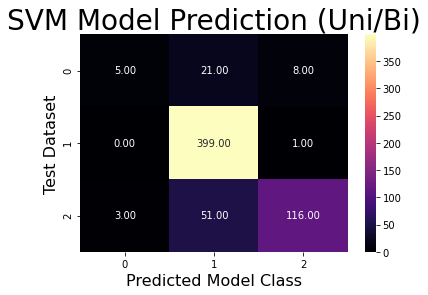

In [100]:
# SVM + uni/bi
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
SVM2score = "80%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("SVM Model Prediction (Uni/Bi)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 27453) (604, 27453)
              precision    recall  f1-score   support

    Negative       0.80      0.12      0.21        34
     Neutral       0.83      1.00      0.91       400
    Positive       0.93      0.65      0.77       170

    accuracy                           0.85       604
   macro avg       0.85      0.59      0.63       604
weighted avg       0.86      0.85      0.83       604



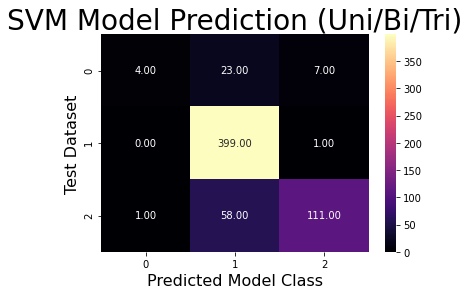

In [102]:
# SVM + uni/bi/tri
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = sklearn.svm.LinearSVC(max_iter=9000)
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
SVM3score = "85%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("SVM Model Prediction (Uni/Bi/Tri)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 4196) (604, 4196)
              precision    recall  f1-score   support

    Negative       1.00      0.03      0.06        34
     Neutral       0.94      0.86      0.90       400
    Positive       0.64      0.89      0.75       170

    accuracy                           0.82       604
   macro avg       0.86      0.59      0.57       604
weighted avg       0.86      0.82      0.81       604



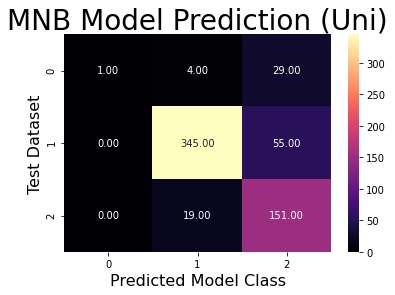

In [105]:
# MNB is similar methodology used with TextBlob
# MNB + uni
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
# assign accuracy score
MNB1score = "86%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("MNB Model Prediction (Uni)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 15206) (604, 15206)
              precision    recall  f1-score   support

    Negative       1.00      0.03      0.06        34
     Neutral       0.91      0.88      0.90       400
    Positive       0.67      0.85      0.75       170

    accuracy                           0.82       604
   macro avg       0.86      0.59      0.57       604
weighted avg       0.85      0.82      0.81       604



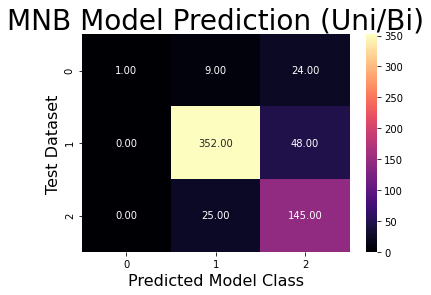

In [107]:
# MNB + uni/bi
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
MNB2score = "86%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("MNB Model Prediction (Uni/Bi)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

(1812, 27453) (604, 27453)
              precision    recall  f1-score   support

    Negative       1.00      0.03      0.06        34
     Neutral       0.90      0.89      0.89       400
    Positive       0.67      0.82      0.74       170

    accuracy                           0.82       604
   macro avg       0.86      0.58      0.56       604
weighted avg       0.84      0.82      0.80       604



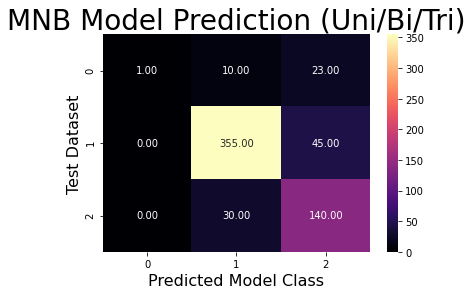

In [109]:
# MNB + uni/bi/tri
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(model_train['text'])
tf_features_test = vectorizer.transform(model_test['text'])
print (tf_features_train.shape, tf_features_test.shape)
 
clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)
 
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))
MNB3score = "86%"
cm = confusion_matrix(test_labels, predictions)

# use the fited models to plot the expected distribution and accuracy
sns.heatmap(cm, annot=True, fmt='.2f', cmap = "magma")
plt.title("MNB Model Prediction (Uni/Bi/Tri)", fontsize = 28)
plt.xlabel("Predicted Model Class", fontsize = 16)
plt.ylabel("Test Dataset", fontsize = 16)
plt.show()

In [110]:
# create a table of the macro prcision results 
# these results reflected full training/test sets without the removal of duplicate through the df4 rewritting
# the higher the percentage, demonstrates improvement of accuracy
# using macro avg precision for reporting
results = {'Model': ['Logistic Regression', 'Linear SVM', 'Multinomial NB'],
           'Unigram': [L1score,SVM1score, MNB1score],
           'Uni-Bi/Gram': [L2score, SVM2score, MNB2score],
           'Uni-Bi-Tri/Gram':[L3score, SVM3score, MNB3score]}
dfResults = pd.DataFrame(results, columns = ['Model', 'Unigram','Uni-Bi/Gram', 'Uni-Bi-Tri/Gram' ])
print(dfResults)

                 Model Unigram Uni-Bi/Gram Uni-Bi-Tri/Gram
0  Logistic Regression     86%         83%             91%
1           Linear SVM     83%         80%             85%
2       Multinomial NB     86%         86%             86%


In [111]:
# assign vars of interest for the model
vars = ['likecount', 'textCount', 'hashtagsCount', 'retweetcount', 'replycount']

# assign varibles of interest from the data frame
cleanFullDataModel = cleanFullData[vars]

# droping any NaN
cleanFullDataModel = cleanFullDataModel.dropna() 

# create matrices for the visualization 
y, X = dmatrices('likecount ~ hashtagsCount + textCount + retweetcount + replycount', data = cleanFullDataModel, return_type = 'dataframe')

In [112]:
# fit our model ~ with the data collected, we wanted to observe primarily the use of hashtags and established
# some controls 
# create our model
model = sm.OLS(y, X)

# fit our model
results = model.fit()

# summarize the results similar to other output like Stata/R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              likecount   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1067.
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:30:50   Log-Likelihood:                -14854.
No. Observations:                2416   AIC:                         2.972e+04
Df Residuals:                    2411   BIC:                         2.975e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.6798     14.866      0.920